In [1]:
# Load dependency pairs
with open("dep_pairs.txt", encoding="utf-8") as f:
    pairs = [line.strip().split("\t") for line in f.readlines()]

print(f"Total pairs: {len(pairs)}")
print("Sample pairs:", pairs[:10])


Total pairs: 26844
Sample pairs: [['有', 'NSUBJ:森林'], ['森林', 'NSUBJ^-1:有'], ['树', 'ROOT:有'], ['有', 'ROOT^-1:树'], ['多', 'ADVMOD:很'], ['很', 'ADVMOD^-1:多'], ['树', 'COMPOUND:多'], ['多', 'COMPOUND^-1:树'], ['有', 'OBJ:树'], ['树', 'OBJ^-1:有']]


In [3]:
from gensim.models import Word2Vec

# Load pairs
with open("dep_pairs.txt", encoding="utf-8") as f:
    pairs = [line.strip().split("\t") for line in f]

# Convert to "sentences" of two tokens each
sentences = [[target, context] for target, context in pairs]

# Train Word2Vec
model = Word2Vec(
    sentences,
    vector_size=100,    # embedding dimension
    window=1,           # context window size = 1, since pair only has 2 tokens
    min_count=1,        # include all tokens
    sg=1,               # use skip-gram
    epochs=10
)

# Save model for later
model.save("dep2vec.model")


In [6]:
model.wv.similarity("把", "了")
model.wv.similarity("把", "被")



0.9929541

In [7]:
print(model.wv.most_similar("把", topn=10))


[('的', 0.9986658096313477), ('跟', 0.9977017045021057), ('上', 0.9952090382575989), ('因为', 0.9943144917488098), ('啦', 0.9942483305931091), ('灰色', 0.9941667914390564), ('吧', 0.9941313862800598), ('嗳', 0.9940807223320007), ('大', 0.9940037131309509), ('一样', 0.9939730167388916)]


In [11]:
import numpy as np

vectors = np.array([model.wv[w] for w in neighbors])


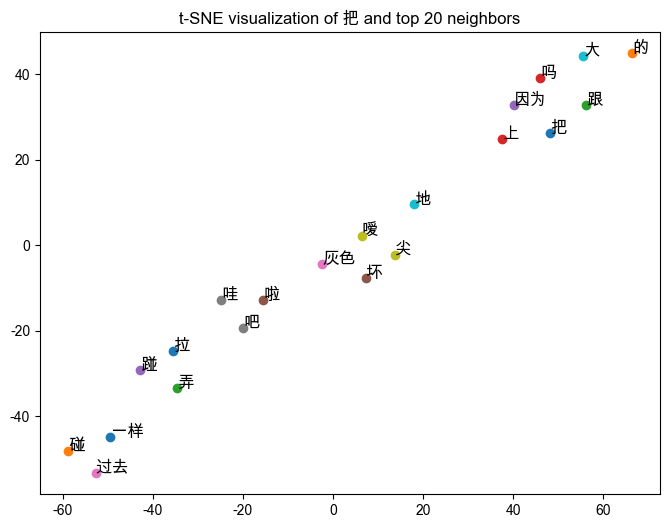

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set a font that supports Chinese characters
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS
# plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows example
plt.rcParams['axes.unicode_minus'] = False


import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

target_word = "把"
neighbors = [target_word] + [w for w, _ in model.wv.most_similar(target_word, topn=20)]

vectors = np.array([model.wv[w] for w in neighbors])  # Convert to np.array

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vec_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(neighbors):
    x, y = vec_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.05, y + 0.05, word, fontsize=12)

plt.title(f"t-SNE visualization of 把 and top 20 neighbors")
plt.show()

